<a href="https://colab.research.google.com/github/sumantn16/Kaggle_Competitions/blob/master/Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Context
Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit.

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. 
### Problem Statement
This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

https://www.kaggle.com/brycecf/give-me-some-credit-dataset/downloads/give-me-some-credit-dataset.zip/1

Lets see the variables used and their significance. Also importing the necessary libraries.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

In [0]:
data_dict = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Credit Scoring/data_dictionary.csv')

In [34]:
data_dict

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


From above data dictionary, we are able to gain meaning of variables used in the dataset. Lets load the training and testing dataset

In [0]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Credit Scoring/cs-training.csv',na_values=-1)
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Credit Scoring/cs-test.csv', na_values=-1)
train_copy = train.copy(deep=True)

In [36]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Lets take the brief info from the training dataset to get number of records present in each of the variable as well as the data type of the variables.

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


So, in our dataset, there are some columns having missing values

In [0]:
## import pandas_profiling as pp

In [0]:
## pp.ProfileReport(train)

In [0]:
# Lets create a function to output missing values & UniqueCounts & DataTypes
def basic_details(df):
    details = pd.DataFrame()
    details['Missing value'] = df.isnull().sum()
    details['N unique value'] = df.nunique()
    details['dtype'] = df.dtypes
    display(details)

In [41]:
basic_details(train)

,Missing value,N unique value,dtype
Unnamed: 0,0,150000,int64
SeriousDlqin2yrs,0,2,int64
RevolvingUtilizationOfUnsecuredLines,0,125728,float64
age,0,86,int64
NumberOfTime30-59DaysPastDueNotWorse,0,16,int64
DebtRatio,0,114194,float64
MonthlyIncome,29731,13594,float64
NumberOfOpenCreditLinesAndLoans,0,58,int64
NumberOfTimes90DaysLate,0,19,int64
NumberRealEstateLoansOrLines,0,28,int64


Hence from above report we can see that there are missing values in two of the columns namely 'Monthly_Income' and 'No_of_dependents'

In [42]:
basic_details(test)

,Missing value,N unique value,dtype
Unnamed: 0,0,101503,int64
SeriousDlqin2yrs,101503,0,float64
RevolvingUtilizationOfUnsecuredLines,0,85716,float64
age,0,82,int64
NumberOfTime30-59DaysPastDueNotWorse,0,16,int64
DebtRatio,0,79878,float64
MonthlyIncome,20103,11976,float64
NumberOfOpenCreditLinesAndLoans,0,56,int64
NumberOfTimes90DaysLate,0,18,int64
NumberRealEstateLoansOrLines,0,24,int64


In [43]:
train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


From here we are observing some glitch that age is having minimum value of zero, which seems not possible. Hence, needs to work on it. Lets check for test data as well

In [44]:
test.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


Lets check the number of records having age less than the oficial age in the financial context.

In [45]:
train[train['age']<18].age.unique()

array([0])

Hence it is confirmed that there are only 0 age records which we need to be replaced with certain value. Lets confirm with summary statistic of age in order to handle the zeros

In [46]:
train['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [47]:
train['age'].median()

52.0

In [0]:
train['age'].replace(to_replace=0, value = train['age'].median(), inplace = True)

Also one more thing to noice tha age cannot be in float in general. Lets make it integer.

In [0]:
train['age']=train['age'].astype('int64')

Lets confirm the changes made on age column 

In [50]:
train.age.describe()

count    150000.000000
mean         52.295553
std          14.771249
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [51]:
train.age.dtype

dtype('int64')

Now to focus on imputing missing values in Monthly income variable, we need to consider age group. As per the financial data is concerned, monthly income ideally should be directly related to the age. Lets make 3 age groups as per the financial situation. 

In [0]:
grp1=train.loc[(train['age']>=18) & (train['age']<40)]['MonthlyIncome'].mean()

In [53]:
grp1

4839.4425614111815

In [0]:
grp2=train.loc[(train['age']>=40) & (train['age']<60)]['MonthlyIncome'].mean()

In [0]:
grp3=train.loc[train['age']>=60]['MonthlyIncome'].mean() # Retired personal

In [0]:
# lets fill all the missing values with some sample number just for the significance to replace later on
train['MonthlyIncome'] = train['MonthlyIncome'].fillna(1)

In [0]:
train['MonthlyIncome'] = train['MonthlyIncome'].astype('int64')

Three individual group mean values are being calculated as per the age groups. Lets impute them in respective records.

In [0]:
train.loc[(train['age']>=18) & (train['age']<40) & (train['MonthlyIncome']==1)]['MonthlyIncome']=grp1

In [0]:
train.loc[(train['age']>=40) & (train['age']<60) & (train['MonthlyIncome']==1)]['MonthlyIncome']=grp2

In [0]:
train.loc[(train['age']>=60) &  (train['MonthlyIncome']==1)]['MonthlyIncome']=grp3

Confirming the filled details again.

In [61]:
basic_details(train)

,Missing value,N unique value,dtype
Unnamed: 0,0,150000,int64
SeriousDlqin2yrs,0,2,int64
RevolvingUtilizationOfUnsecuredLines,0,125728,float64
age,0,85,int64
NumberOfTime30-59DaysPastDueNotWorse,0,16,int64
DebtRatio,0,114194,float64
MonthlyIncome,0,13594,int64
NumberOfOpenCreditLinesAndLoans,0,58,int64
NumberOfTimes90DaysLate,0,19,int64
NumberRealEstateLoansOrLines,0,28,int64


Lets perform the same imputation on test data as well

In [63]:
basic_details(test)

,Missing value,N unique value,dtype
Unnamed: 0,0,101503,int64
SeriousDlqin2yrs,101503,0,float64
RevolvingUtilizationOfUnsecuredLines,0,85716,float64
age,0,82,int64
NumberOfTime30-59DaysPastDueNotWorse,0,16,int64
DebtRatio,0,79878,float64
MonthlyIncome,20103,11976,float64
NumberOfOpenCreditLinesAndLoans,0,56,int64
NumberOfTimes90DaysLate,0,18,int64
NumberRealEstateLoansOrLines,0,24,int64


In case of test dataset, 'SeriousDlqin2yrs' is the target variable, perhaps there are missing values in MonthlyIncome for which we will do the same trick as that of done in the train dataset. For 'NumberOfDependents' variable, we will perform the imputation.

In [0]:
test_grp1=test.loc[(test['age']>=18) & (test['age']<40)]['MonthlyIncome'].mean()
test_grp2=test.loc[(test['age']>=40) & (test['age']<60)]['MonthlyIncome'].mean()
test_grp3=test.loc[test['age']>=60]['MonthlyIncome'].mean()

In [0]:
# lets fill all the missing values with some sample number just for the significance to replace later on
test['MonthlyIncome'] = test['MonthlyIncome'].fillna(1)
test['MonthlyIncome'] = test['MonthlyIncome'].astype('int64')

In [0]:
test.loc[(test['age']>=18) & (test['age']<40) & (test['MonthlyIncome']==1)]['MonthlyIncome']=test_grp1
test.loc[(test['age']>=40) & (test['age']<60) & (test['MonthlyIncome']==1)]['MonthlyIncome']=test_grp2
test.loc[(test['age']>=60) & (test['MonthlyIncome']==1)]['MonthlyIncome']=test_grp3

In [67]:
test.age.describe() # In order to check if there is any zero valued  record in age column 

count    101503.000000
mean         52.405436
std          14.779756
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         104.000000
Name: age, dtype: float64

In [0]:
test['age'] = test['age'].astype('int64')

In [69]:
test.NumberOfDependents.mode()

0    0.0
dtype: float64

Lets impute the number of dependents with the mode value as zero. Also it should be in integer format

In [0]:
train["NumberOfDependents"] = train["NumberOfDependents"].fillna(0) 
# Convert into integer dtype
train["NumberOfDependents"] = train["NumberOfDependents"].astype('int64')

In [0]:
test["NumberOfDependents"] = test["NumberOfDependents"].fillna(0) 
# Convert into integer dtype
test["NumberOfDependents"] = test["NumberOfDependents"].astype('int64')

Lets cross check the entire thing performed on the test dataset.

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
Unnamed: 0                              101503 non-null int64
SeriousDlqin2yrs                        0 non-null float64
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           101503 non-null int64
NumberOfOpenCreditLinesAndLoans         101503 non-null int64
NumberOfTimes90DaysLate                 101503 non-null int64
NumberRealEstateLoansOrLines            101503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    101503 non-null int64
NumberOfDependents                      101503 non-null int64
dtypes: float64(3), int64(9)
memory usage: 9.3 MB


Now lets see the balance of the target variable.

In [74]:
train.SeriousDlqin2yrs.value_counts(normalize=True)

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

we have a unbalanced dataset here. In short, since we have a higher proportion of the dataset not having experienced financial distress (SeriousDlqin2yrs=0) our model may overfit easily to this rather than accurately predicting those having experienced financial distress. Of which is our model objective....Consequently, this would also likely cause an inaccurate portray of the evaluation metrics itself (ROC AUC)...

At the mean time, we will just proceed with this until we see the actual model accuracy results.

We will now use the HeatMap to see which features we can discard or merge.

The **Objective** here is to remove those features bearing high correlations (Remove Multi-Colinearity which causes over-fitting) & engineer more features to optimize the predictive model

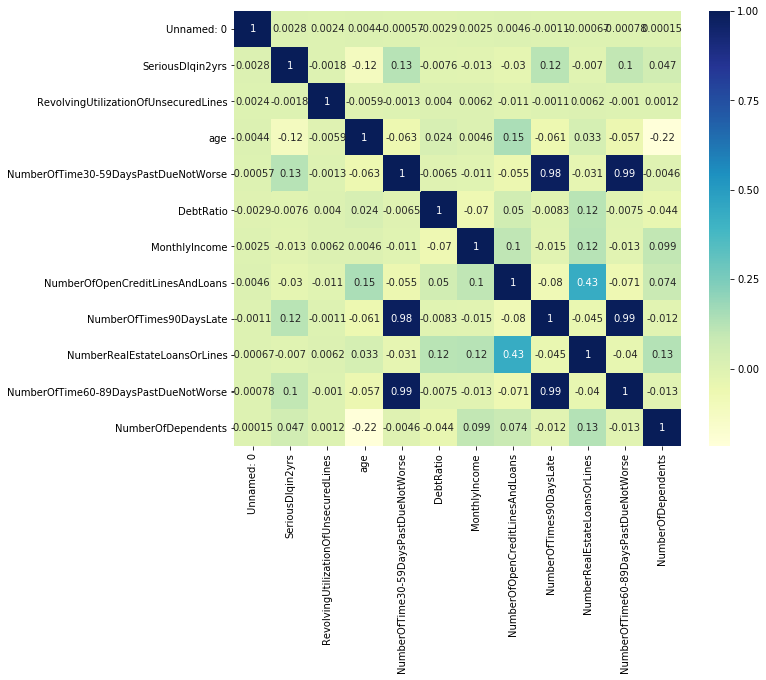

In [75]:
#Correlation Heat-Map
cor = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

As we can see that there is highly multi colinearity being observed however more surprisingly, the Monthky income variable is having weak relation with target variable.

Evidently, we can see NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse all bear high correlations 0.98. We will try to merge them to avoid collinearity which may overfit the model by distorting or giving higher and incorrect feature weightings.

Creating a new dataframe column of a Binary datatype indicating if a default was made before or not. (1/0) (Yes/No)

In [0]:
# Creating Dummy Reference df
train['new'] = (train['NumberOfTime30-59DaysPastDueNotWorse']
              + train['NumberOfTimes90DaysLate']
              + train['NumberOfTime60-89DaysPastDueNotWorse'])

In [0]:
# Set '1' for those more than zero indicating Yes there was a default before
train['CombinedDefault'] = 1
train.loc[(train['new'] == 0), 'CombinedDefault'] = 0

In [78]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,new,CombinedDefault
0,1,1,0.766127,45,2,0.802982,9120,13,0,6,0,2,2,1
1,2,0,0.957151,40,0,0.121876,2600,4,0,0,0,1,0,0
2,3,0,0.658180,38,1,0.085113,3042,2,1,0,0,0,2,1
3,4,0,0.233810,30,0,0.036050,3300,5,0,0,0,0,0,0
4,5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0,1,1


In [0]:
# Remove Dummy Reference df
del train['new']

We will now use a very generic networth formula. In short, incorporate Age & Monthly Income to derive Net Worth.

In [0]:
# Decided on general formula NetWorth = (MonthlyIncome x Age) / 10
NetWorthDivisor = 10
train['NetWorth'] = train['MonthlyIncome'] * train['age'] / NetWorthDivisor

In [0]:
#Joining No# Loans: CombinedLoan
# Sum all & WITH BUFFER of 5times
LoanLinesBuffer = 5
# Create Dummy Reference df
train['CL'] = train['NumberOfOpenCreditLinesAndLoans'] + train['NumberRealEstateLoansOrLines']

In [82]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CombinedDefault,NetWorth,CL
0,1,1,0.766127,45,2,0.802982,9120,13,0,6,0,2,1,41040.0,19
1,2,0,0.957151,40,0,0.121876,2600,4,0,0,0,1,0,10400.0,4
2,3,0,0.658180,38,1,0.085113,3042,2,1,0,0,0,1,11559.6,2
3,4,0,0.233810,30,0,0.036050,3300,5,0,0,0,0,0,9900.0,5
4,5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0,1,311581.2,8


In [0]:
train['CombinedLoan'] = 1
train.loc[train['CL'] >= LoanLinesBuffer, 'CombinedLoan'] = 1
train.loc[train['CL'] < LoanLinesBuffer, 'CombinedLoan'] = 0

In [84]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CombinedDefault,NetWorth,CL,CombinedLoan
0,1,1,0.766127,45,2,0.802982,9120,13,0,6,0,2,1,41040.0,19,1
1,2,0,0.957151,40,0,0.121876,2600,4,0,0,0,1,0,10400.0,4,0
2,3,0,0.658180,38,1,0.085113,3042,2,1,0,0,0,1,11559.6,2,0
3,4,0,0.233810,30,0,0.036050,3300,5,0,0,0,0,0,9900.0,5,1
4,5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0,1,311581.2,8,1


In [0]:
# Remove Dummy Reference df
del train['CL']

In [0]:
# Building New Feature: Monthly debt payments
# formula MonthlyDebtPayments = (DebtRatio) x (MonthlyIncome)
train['MonthlyDebtPayments'] = train['DebtRatio'] * train['MonthlyIncome']
train['MonthlyDebtPayments'] = train['MonthlyDebtPayments'].astype('int64')

In [0]:
# Creating Age Category
train["Age_Map"] = train["age"]
train.loc[(train["age"] >= 18) & (train["age"] < 41), "Age_Map"] = 1
train.loc[(train["age"] >= 41) & (train["age"] < 63), "Age_Map"] = 2
train.loc[(train["age"] >= 63), "Age_Map"] = 3

In [0]:
# replacing those numbers to categorical features then get the dummy variables
train["Age_Map"] = train["Age_Map"].replace(1, "Working")
train["Age_Map"] = train["Age_Map"].replace(2, "Senior")
train["Age_Map"] = train["Age_Map"].replace(3, "Retired")

In [89]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CombinedDefault,NetWorth,CombinedLoan,MonthlyDebtPayments,Age_Map
0,1,1,0.766127,45,2,0.802982,9120,13,0,6,0,2,1,41040.0,1,7323,Senior
1,2,0,0.957151,40,0,0.121876,2600,4,0,0,0,1,0,10400.0,0,316,Working
2,3,0,0.658180,38,1,0.085113,3042,2,1,0,0,0,1,11559.6,0,258,Working
3,4,0,0.233810,30,0,0.036050,3300,5,0,0,0,0,0,9900.0,1,118,Working
4,5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0,1,311581.2,1,1584,Senior


In [0]:
# Creating dummies of age categories
train = pd.concat([train, pd.get_dummies(train.Age_Map, prefix='is')], axis=1)

In [0]:
#Binning Income Category
train["Income_Map"] = train["MonthlyIncome"]
train.loc[(train["MonthlyIncome"] <= 3400), "Income_Map"] = 1
train.loc[(train["MonthlyIncome"] > 3400) & (train["MonthlyIncome"] <= 8200), "Income_Map"] = 2
train.loc[(train["MonthlyIncome"] > 8200), "Income_Map"] = 3

In [0]:
# replacing those numbers to categorical features then get the dummy variables
train["Income_Map"] = train["Income_Map"].replace(1, "LowY")
train["Income_Map"] = train["Income_Map"].replace(2, "MidY")
train["Income_Map"] = train["Income_Map"].replace(3, "HighY")

In [0]:
# Creating dummies of MonthlyIncome categories
train = pd.concat([train, pd.get_dummies(train.Income_Map, prefix='is')], axis=1)

In [94]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CombinedDefault,NetWorth,CombinedLoan,MonthlyDebtPayments,Age_Map,is_Retired,is_Senior,is_Working,Income_Map,is_HighY,is_LowY,is_MidY
0,1,1,0.766127,45,2,0.802982,9120,13,0,6,0,2,1,41040.0,1,7323,Senior,0,1,0,HighY,1,0,0
1,2,0,0.957151,40,0,0.121876,2600,4,0,0,0,1,0,10400.0,0,316,Working,0,0,1,LowY,0,1,0
2,3,0,0.658180,38,1,0.085113,3042,2,1,0,0,0,1,11559.6,0,258,Working,0,0,1,LowY,0,1,0
3,4,0,0.233810,30,0,0.036050,3300,5,0,0,0,0,0,9900.0,1,118,Working,0,0,1,LowY,0,1,0
4,5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0,1,311581.2,1,1584,Senior,0,1,0,HighY,1,0,0


In [95]:
# lets see what all features we do have till now and their kind
Features = train.columns
Original = ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
                               'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
                               'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
                               'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
                               'NumberOfDependents']
Engineered = ['CombinedDefault', 'NetWorth', 'CombinedLoan', 'MonthlyDebtPayments', 'is_Retired',
                                 'is_Senior', 'is_Working', 'is_HighY', 'is_LowY', 'is_MidY']

# Binary_bin
Binary = ['CombinedLoan', 'Age_Map', 'Income_Map']
print("Binary", "\n", Binary)

# Integer_'int'_Ordinal
Integer = ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
           'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
           'CombinedDefault']
print("Integer_Ordinal", "\n", Integer)

# Real_'float'_Interval
Real = ['DebtRatio', 'MonthlyIncome', 'NetWorth', 'MonthlyDebtPayments']
print("Real_float", "\n", Real)

Binary 
 ['CombinedLoan', 'Age_Map', 'Income_Map']
Integer_Ordinal 
 ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'CombinedDefault']
Real_float 
 ['DebtRatio', 'MonthlyIncome', 'NetWorth', 'MonthlyDebtPayments']


### Univariate Analysis

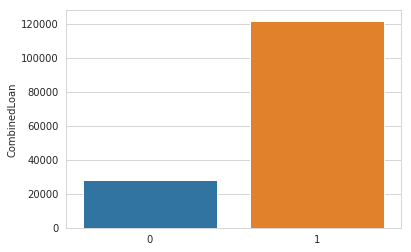

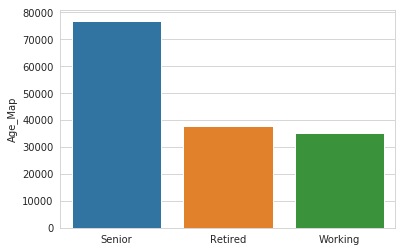

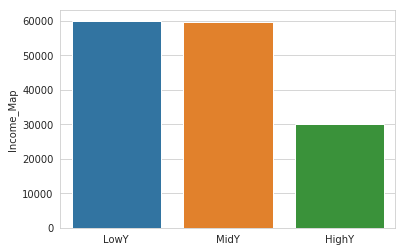

In [96]:
# lets start with Binary variables
sns.set_style("whitegrid")  
for i in Binary:
    sns.barplot(x=train[i].value_counts().index, y=train[i].value_counts())
    plt.show()

#### Brief Observations

- CombinedLoan: Very lob-sided where 3/4 have made loans

- Age_Map: Data-set contains mostly ages 41 to 63

- Income_Map: Data-set dominated by High & Mid income earners

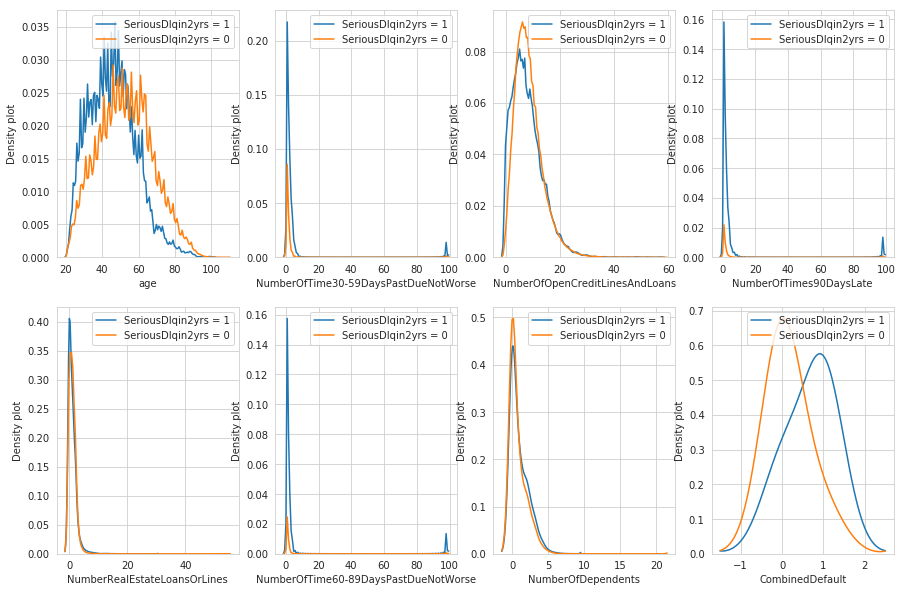

In [97]:
# Now performing univariate analysis on Integer
i = 0
t1 = train.loc[train['SeriousDlqin2yrs'] != 0]
t0 = train.loc[train['SeriousDlqin2yrs'] == 0]

sns.set_style('whitegrid')

fig, ax = plt.subplots(2, 4, figsize=(15, 10))

for feature in Integer:
    i += 1
    plt.subplot(2, 4, i)
    sns.kdeplot(t1[feature], bw=0.5, label="SeriousDlqin2yrs = 1")
    sns.kdeplot(t0[feature], bw=0.5, label="SeriousDlqin2yrs = 0")
    plt.ylabel('Density plot', fontsize=10)
    plt.xlabel(feature, fontsize=10)
    locs, labels = plt.xticks()
    plt.tick_params(labelsize=10)
plt.show()

### Brief Observations

- age: Same trend as seen from Age_Map in Binary EDA. Majority of data-set are between ages 41 to 63

- NumberOfTime30-59DaysPastDueNotWorse: Very High Kurtosis & right-skewed

- NumberOfOpenCreditLinesAndLoans: High Kurtosis & Right-skewed

- NumberOfTimes90DaysLate: Very High Kurtosis & Very Right-skewed

- NumberRealEstateLoansOrLines: High Kurtosis & Right-skewed

- NumberOfTime60-89DaysPastDueNotWorse: Very High Kurtosis & Very Right-skewed

- NumberOfDependents: High Kurtosis & Right-skewed

- CombinedDefault: Gaussian distribution shape

- Reasonable data-set as those who experience financial distress (SeriousDlqin2yrs=1) have left skewed (Median>Mean).

- In other words, data population who experience financial distress have a greater proportion of defaults

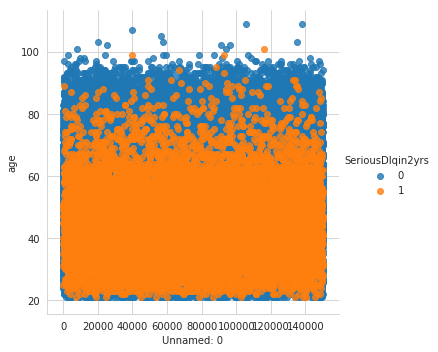

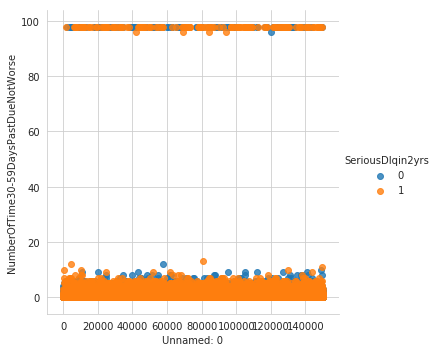

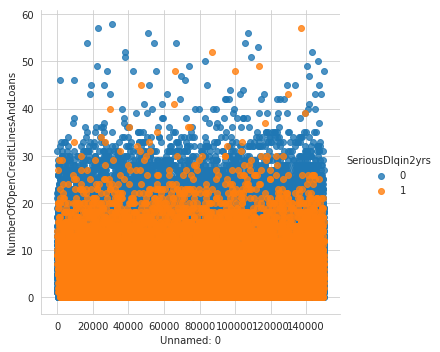

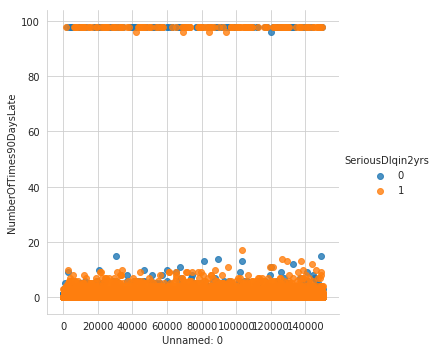

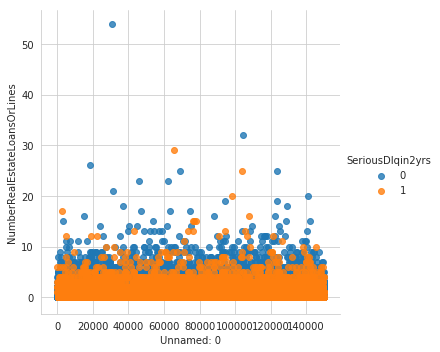

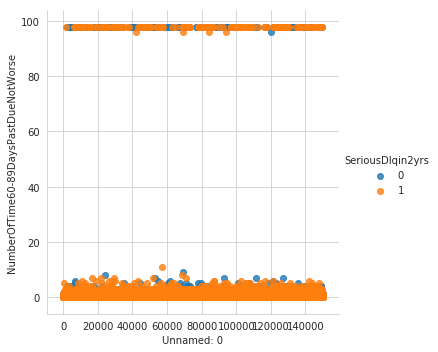

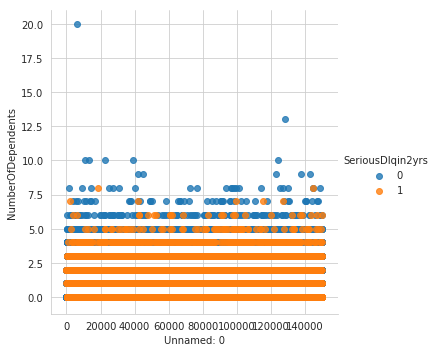

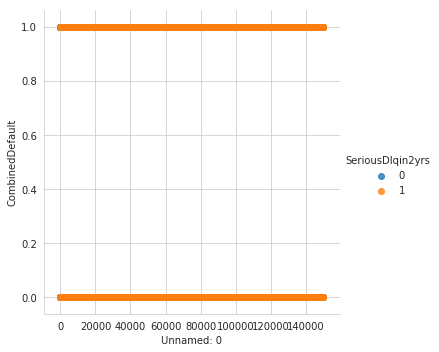

In [98]:
sns.set_style('whitegrid')
for i in Integer:
    sns.lmplot(y=i, x='Unnamed: 0', data=train, fit_reg=False, hue='SeriousDlqin2yrs', legend=True,size=5, aspect=1)
    plt.show()

### Brief Observations

- age: Same pattern seen. Concentrated on ages 41 to 63

- NumberOfTime30-59DaysPastDueNotWorse: Interesting disparity! In other words, we have extreme frequency's.

- NumberOfOpenCreditLinesAndLoans: Evidently, those who have had financial distress (SeriousDlqin2yrs=1) have lower Loans given their poor credit history

- NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines: Same pattern as 'NumberOfTime30-59DaysPastDueNotWorse'

- NumberOfTime60-89DaysPastDueNotWorse: Same pattern as 'NumberOfTime30-59DaysPastDueNotWorse'

- NumberOfDependents': Interesting, those who have had financial distress (SeriousDlqin2yrs=1) tend to have lesser dependents than those who have had financial distress

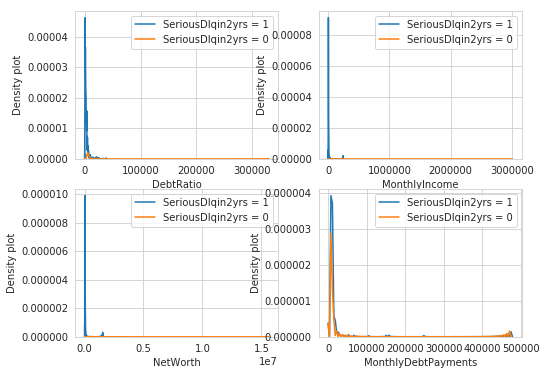

In [99]:
i = 0
t1 = train.loc[train['SeriousDlqin2yrs'] != 0]
t0 = train.loc[train['SeriousDlqin2yrs'] == 0]

sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

for feature in Real:
    i += 1
    plt.subplot(2, 2, i)
    sns.kdeplot(t1[feature], bw=0.5, label="SeriousDlqin2yrs = 1")
    sns.kdeplot(t0[feature], bw=0.5, label="SeriousDlqin2yrs = 0")
    plt.ylabel('Density plot', fontsize=10)
    plt.xlabel(feature, fontsize=10)
    locs, labels = plt.xticks()
    plt.tick_params(labelsize=10)
plt.show()

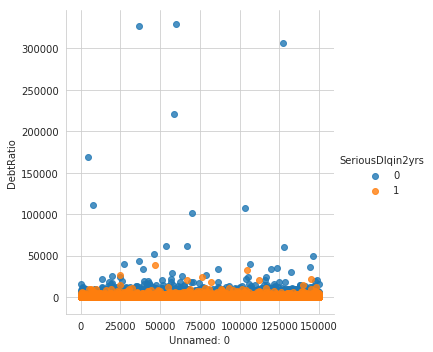

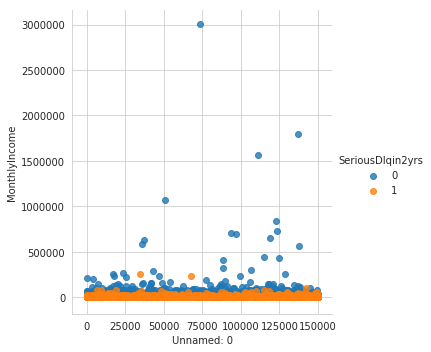

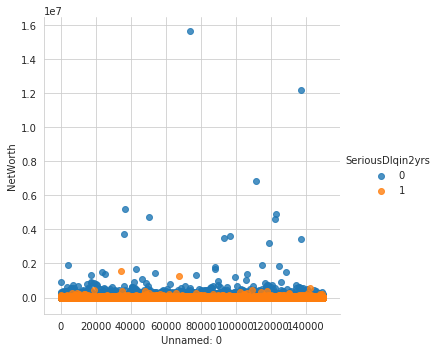

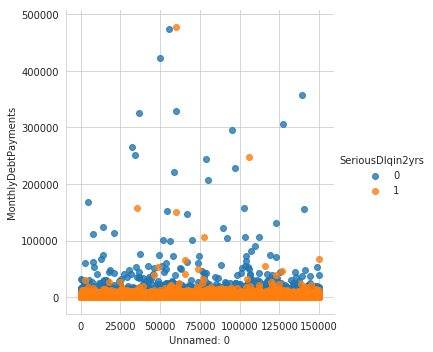

In [100]:
sns.set_style("whitegrid") 
for col in Real:
    sns.lmplot(y=col, x="Unnamed: 0", data=train, fit_reg=False, hue='SeriousDlqin2yrs', legend=True,
               size=5, aspect=1)
    plt.show()

### Brief Observations

- DebtRatio': Contrastingly, those who have had financial distress (SeriousDlqin2yrs=1) posses lower DebtRatio

- MonthlyIncome': Interesting! Data-set actually has a huge income disparity for those who have had financial distress (SeriousDlqin2yrs=1).

- Evidently, from our Preliminary Overview it has a StandardDeviation of 3.650860e+04.

- Disparity roughly is between the Less than 33,000 & capping at =100,000.(SeriousDlqin2yrs=0) instead is more evened out.

- NetWorth': Reasonable sense, since those who have had financial distress (SeriousDlqin2yrs=1) have lower net worth

- MonthlyDebtPayments': Similar to the pattern found in 'DebtRatio' those who have had financial distress (SeriousDlqin2yrs=1) are paying out lesser existing debts

### Bivariate Analysis

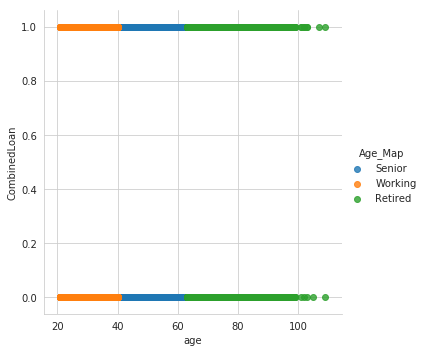

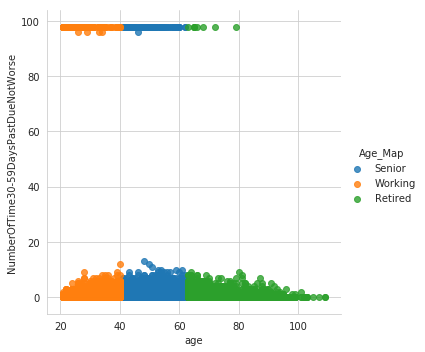

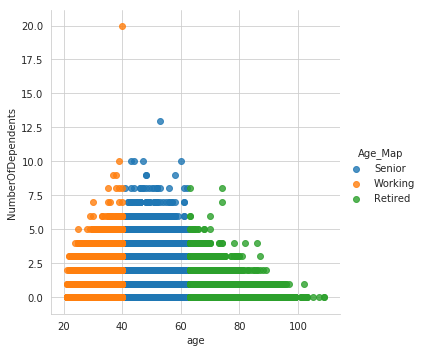

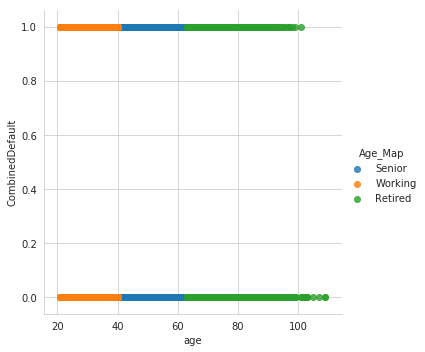

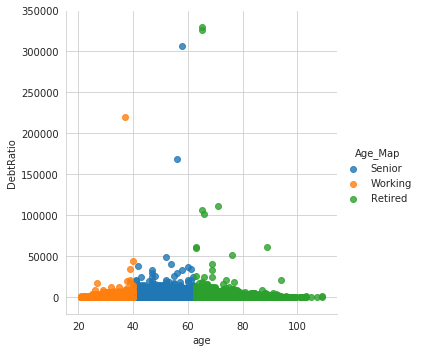

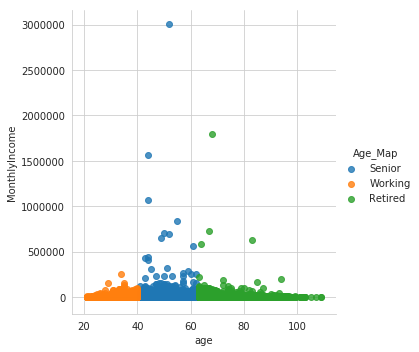

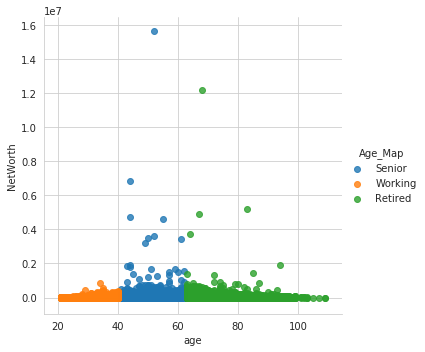

In [101]:
BiVariate_1 = ['CombinedLoan',
                   'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfDependents', 'CombinedDefault',
                   'DebtRatio', 'MonthlyIncome',  'NetWorth']
sns.set_style("whitegrid") 
for col in BiVariate_1:
    sns.lmplot(y=col, x='age', data=train, fit_reg=False, hue='Age_Map', legend=True,
               size=5, aspect=1)
    plt.show()

### Observation:

- CombinedLoan': For both category's of those who made & did not make a loans, they are dominated by 'Retired' by more than 2x

- NumberOfTime30-59DaysPastDueNotWorse':

- On the high extreme end, of exceeding over 95times they are split evenly between 'Working' & 'Senior' category's. But rarely 'Retired'.

- On the low extreme end, of exceeding over but below 15times they are split evenly between between 'Working' & 'Senior' category's. But this time dominated by 'Retired'

- NumberOfDependents': 'Working' & 'Senior' category's tend to have higher number of dependents. Evidently, mortality means as we grow older we see more deaths..

- CombinedDefault': Same pattern as 'CombinedLoan'

- DebtRatio': Evidently, as 'age' increases 'DebtRatio' increases. But begins falling upon retirement at age 63

- MonthlyIncome': Similar to before, in Uni-variate EDA we spotted a disparity in 'MonthlyIncome'. But this time we can clearly see a gaussian shape appearing. which is also similar to 'DebtRatio' pattern

- Evidently, as 'age' increases 'MonthlyIncome' increases. But begins falling upon retirement at age 63

- NetWorth': This emphasizes the pattern. Evidently, as 'age' increases 'NetWorth' increases. But begins falling upon retirement at age 63.

- HOWEVER, the positive gradient also highlights the flaw in our 'NetWorth' Derivation. Since we are essentially assuming constant income growth & ignoring depreciation considerations for the time value of money (i.e.From my placement year in a Pension's Consultancy firm, we need to include annuities which accounts for both interest rates and mortality.

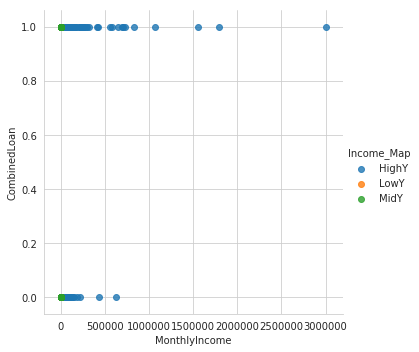

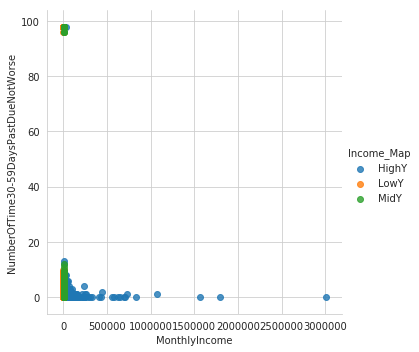

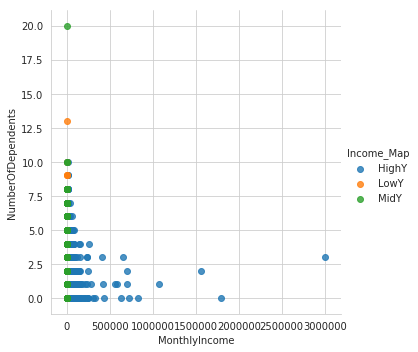

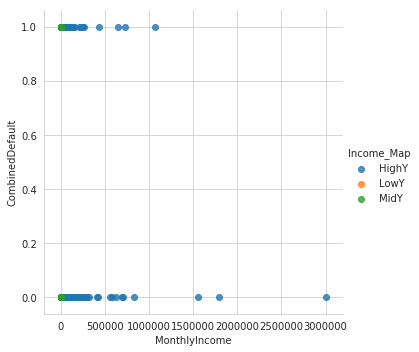

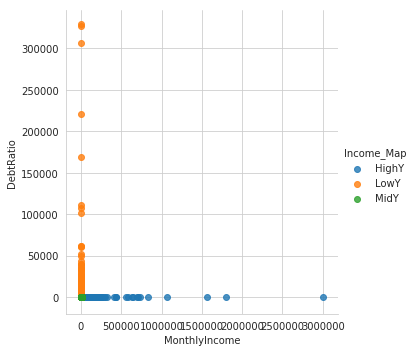

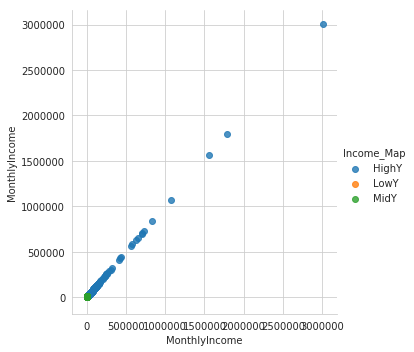

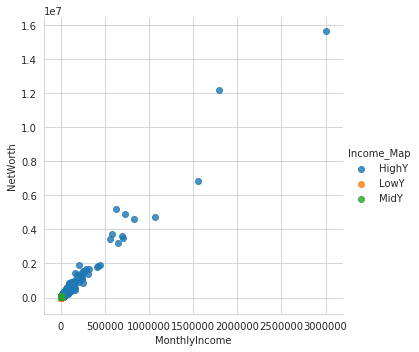

In [102]:
BiVariate_2 = ['CombinedLoan',
                   'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfDependents', 'CombinedDefault',
                   'DebtRatio', 'MonthlyIncome',  'NetWorth']
sns.set_style("whitegrid")  
for col in BiVariate_1:
    sns.lmplot(y=col, x='MonthlyIncome', data=train, fit_reg=False, hue='Income_Map', legend=True,
               size=5, aspect=1)
    plt.show()

### Observations:

- CombinedLoan': Clearly, those who have made & did not make Loans are dominated by the higher tier income earners

- NumberOfTime30-59DaysPastDueNotWorse': From a relative perspective, those who exceed the 30-59Days deadline are dominated by higher tier income earners

- NumberOfDependents': The higher the 'MonthlyIncome', the lower the Dependents

- CombinedDefault': Same pattern as 'CombinedLoan'

- DebtRatio': The higher the 'MonthlyIncome', the higher the 'DebtRatio'

- NetWorth': Obvious of higher 'MonthlyIncome' equates to higher 'NetWorth'

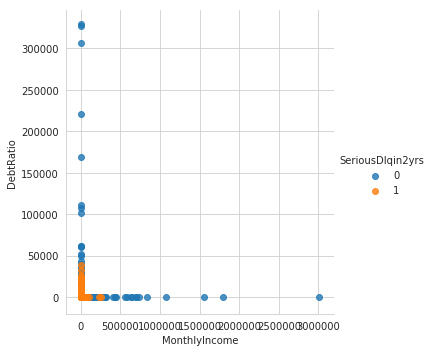

In [103]:
sns.set_style("whitegrid")  
sns.lmplot(y='DebtRatio', x='MonthlyIncome', data=train, fit_reg=False, hue='SeriousDlqin2yrs', legend=True,
           size=5, aspect=1)
plt.show()

- Those who have had financial distress (SeriousDlqin2yrs=1) clearly have lower 'DebtRatio' & 'MonthlyIncome'

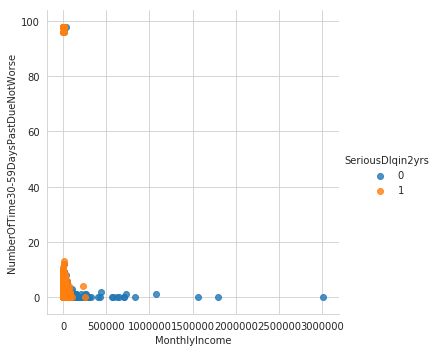

In [104]:
sns.lmplot(y='NumberOfTime30-59DaysPastDueNotWorse', x='MonthlyIncome', data=train, fit_reg=False,
           hue='SeriousDlqin2yrs', legend=True, size=5, aspect=1)
plt.show()

- Contrastingly, often those who have had financial distress (SeriousDlqin2yrs=1) have exceeded the 30-59Days deadline only a few times

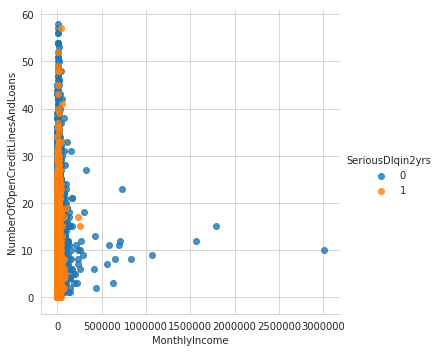

In [105]:
sns.lmplot(y='NumberOfOpenCreditLinesAndLoans', x='MonthlyIncome', data=train, fit_reg=False,
           hue='SeriousDlqin2yrs', legend=True, size=5, aspect=1)
plt.show()

- Similarly, those who have had financial distress (SeriousDlqin2yrs=1) actually open lesser loans than those of without financial distress (SeriousDlqin2yrs=0)

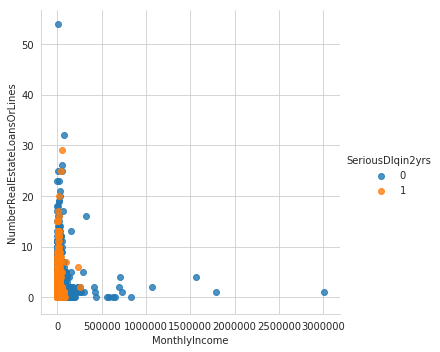

In [106]:
sns.lmplot(y='NumberRealEstateLoansOrLines', x='MonthlyIncome', data=train, fit_reg=False,
           hue='SeriousDlqin2yrs', legend=True, size=5, aspect=1)
plt.show()

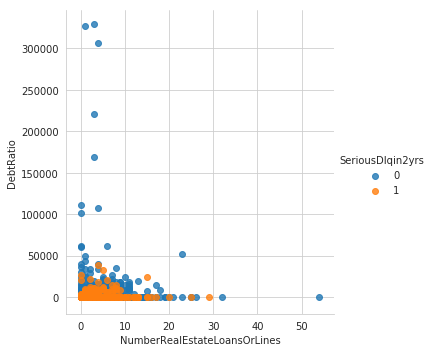

In [107]:
sns.lmplot(y='DebtRatio', x='NumberRealEstateLoansOrLines', data=train, fit_reg=False, hue='SeriousDlqin2yrs',
           legend=True, size=5, aspect=1)
plt.show()

- Similarly, those who have had financial distress (SeriousDlqin2yrs=1) actually a lower 'DebtRatio' than those of without financial distress (SeriousDlqin2yrs=0)

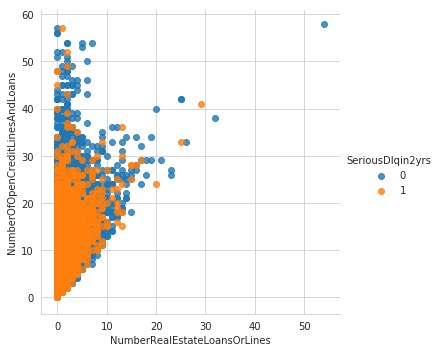

In [108]:
sns.lmplot(y='NumberOfOpenCreditLinesAndLoans', x='NumberRealEstateLoansOrLines', data=train, fit_reg=False,
           hue='SeriousDlqin2yrs', legend=True, size=5, aspect=1)
plt.show()

- A realistic scenario here.
As the RealEstateLoans increases, borrowers tendency to open other lines and loans (Credit loans) decreases.

### Quick Summary over EDA:

- Disobedient acts (making excessive loans & defaults or exceed deadlines) often made by 'Retired'

- Realistic data-set, income plateau and falls while proceeding with age

- Disobedient acts often made by Higher-tier income

- Credit balloon; since as Higher-tier income exhibit higher extremes of making loans & experiencing default

- Higher-tier income tend to have lesser dependents. Self-centred data-set?

- Contrasting relationships. When experiencing financial distress (SeriousDlqin2yrs=1), borrows actually have a "apt" financial circumstance (lower 'DebtRatio' & exceeding deadlines & making loans or having defaults) but only have low 'MonthlyIncome'

- low 'MonthlyIncome' main driver for financial distress, while 'DebtRatio' & exceeding deadlines & making loans or having defaults play less significant effect.


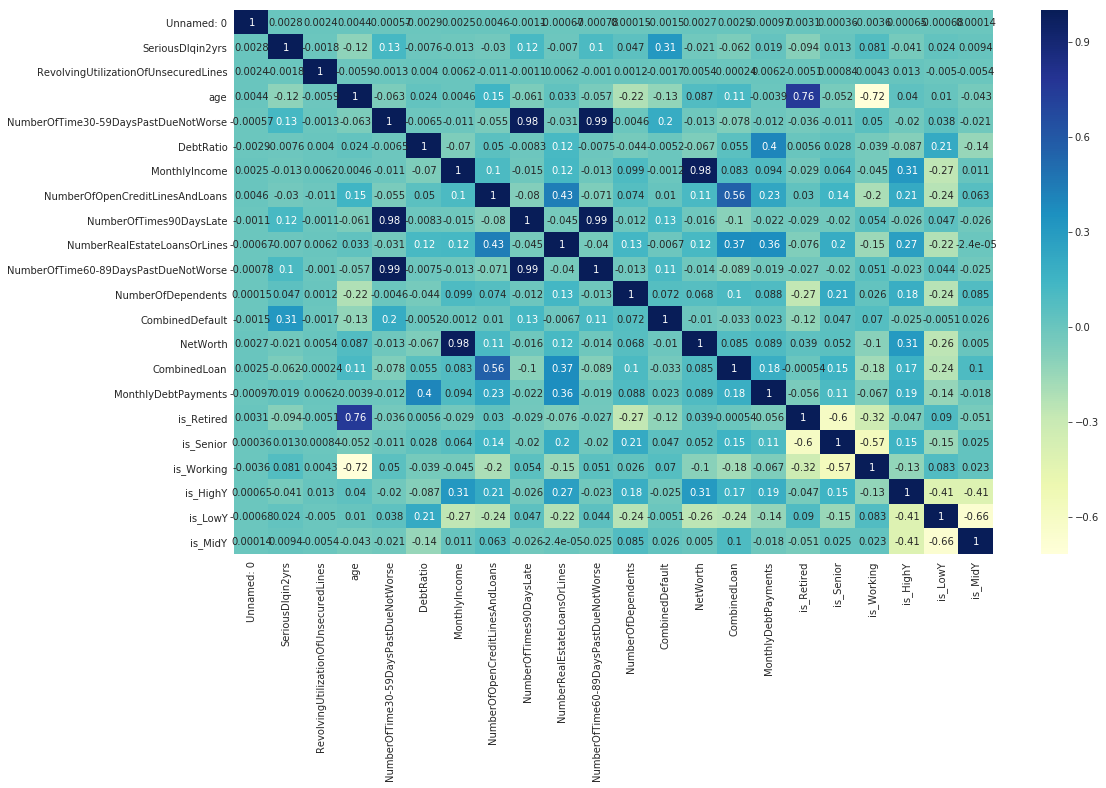

In [109]:
cor = train.corr()
plt.figure(figsize=(17, 10))
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

## Coclusive from Heatmap:

- Now with the added support of the HeatMap correlations to our EDA analysis, we can further justify and decide on which features to discard or keep. 

- Keep CombinedDefault since it outperforms in correlation

- Keep 'NumberOfTime30-59DaysPastDueNotWorse' since it has the highest 'target variable' correlation amonst the original 3. But still bears low multi-collinearity with CombinedDefault

- Drop NumberOfTime60-89DaysPastDueNotWorse & NumberOfTimes90DaysLate

- Keep NetWorth since it outperforms in correlation

- Drop MonthlyIncome; Since NetWorth has higher correlation. NetWorth as a proxy for 'MonthlyIncome' given the formula.

- Keep CombinedLoans. Used as proxy for original features

- Drop NumberOfOpenCreditLinesAndLoans & NumberRealEstateLoansOrLines to avoid multi-collinearity. 

- Drop MonthlyDebtPayments since its correlation is still lower than 'DebtRatio'

- Drop Age_Map & is_Retired & is_Senior & is_Working, since original 'age' outperforms

- Drop Income_Map & is_LowY & is_MidY & is_HighY, since original 'MonthlyIncome'' outperforms

In [0]:
train_Drop = train

ColumnsToDrop = ['Unnamed: 0', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
                 'MonthlyIncome',
                 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
                 'MonthlyDebtPayments',
                 'Age_Map', 'is_Retired', 'is_Senior', 'is_Working',
                 'Income_Map', 'is_LowY', 'is_MidY', 'is_HighY']

train.drop(columns=ColumnsToDrop, inplace=True)

In [0]:
test['CD'] = (test['NumberOfTime30-59DaysPastDueNotWorse']
                     + test['NumberOfTimes90DaysLate']
                     + test['NumberOfTime60-89DaysPastDueNotWorse'])
test['CombinedDefault'] = 1
test.loc[(test['CD'] == 0), 'CombinedDefault'] = 0
del test['CD']

In [0]:
test['NetWorth'] = test['MonthlyIncome'] * test['age'] / NetWorthDivisor

test['CL'] = (test['NumberOfOpenCreditLinesAndLoans']
                 + test['NumberRealEstateLoansOrLines'])
test['CombinedLoan'] = 1
test.loc[test['CL'] >= LoanLinesBuffer, 'CombinedLoan'] = 1
test.loc[test['CL'] < LoanLinesBuffer, 'CombinedLoan'] = 0
del test['CL']

In [0]:
to_drop = ['Unnamed: 0', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
               'MonthlyIncome',
               'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines']
test.drop(columns=to_drop, inplace=True)

In [114]:
train.shape

(150000, 9)

In [115]:
test.shape

(101503, 9)

In [116]:
train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfDependents', 'CombinedDefault', 'NetWorth', 'CombinedLoan'],
      dtype='object')

In [0]:
X = train.drop('SeriousDlqin2yrs',axis=1)
y = pd.DataFrame(train.pop('SeriousDlqin2yrs'))

In [0]:
X_test = test.drop('SeriousDlqin2yrs',axis=1)
y_test = pd.DataFrame(test.pop('SeriousDlqin2yrs'))

In [0]:
from scipy.stats import zscore

In [0]:
scaled_train= X.apply(zscore)
scaled_test = X_test.apply(zscore)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [0]:
pred = knn.fit(scaled_train,train_copy['SeriousDlqin2yrs']).predict_proba(scaled_test)
pred = pred[:,1]

In [0]:
result = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Credit Scoring/cs-test.csv', na_values=-1)

In [0]:
result = result.drop(["RevolvingUtilizationOfUnsecuredLines",
                             "age",
                             "NumberOfTime30-59DaysPastDueNotWorse",
                             "DebtRatio",
                             "MonthlyIncome",
                             "NumberOfOpenCreditLinesAndLoans",
                             "NumberOfTimes90DaysLate",
                             "NumberRealEstateLoansOrLines",
                             "NumberOfTime60-89DaysPastDueNotWorse",
                             "NumberOfDependents"], axis=1)



In [0]:
result.SeriousDlqin2yrs = pred

result = result.rename(columns={'Unnamed: 0': 'Id',
                                        'SeriousDlqin2yrs': 'Probability'})

In [152]:
result.head()

,Id,Probability
0,1,0.0
1,2,0.2
2,3,0.0
3,4,0.2
4,5,0.0


In [0]:
from google.colab import files
result.to_csv('Credit_score_knn.csv',index=False) 
files.download('Credit_score_knn.csv')

So KNN base model is giving us the accuracy of 68.739 % Lets apply random forest algorithm

In [0]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [0]:
rf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
rf = rf.fit(X,y)

In [0]:
features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = rf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

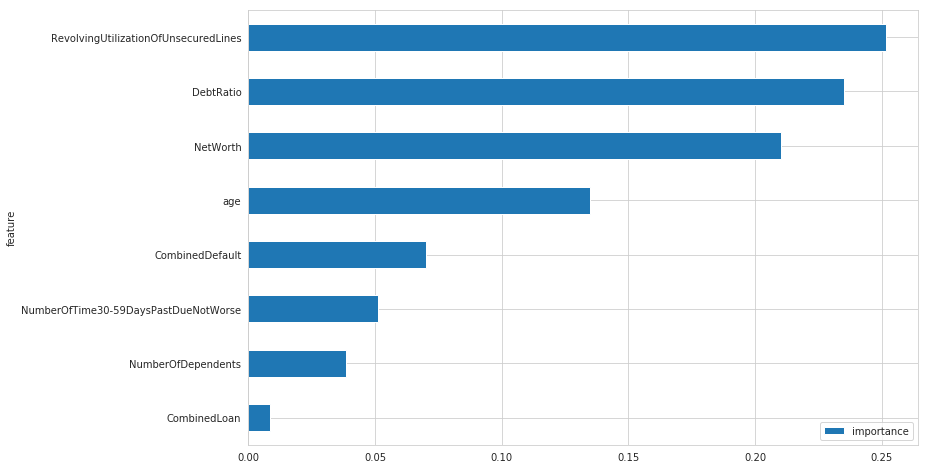

In [159]:
features.plot(kind='barh', figsize=(12, 8))

In [162]:
parameters = {'n_estimators': 100, 'random_state' : 123}
    
model2 = RandomForestClassifier(**parameters)
model2.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [0]:
rf_pred = model2.predict_proba(scaled_test)
rf_pred = rf_pred[:,1]

In [0]:
result.SeriousDlqin2yrs = rf_pred

result = result.rename(columns={'Unnamed: 0': 'Id',
                                        'SeriousDlqin2yrs': 'Probability'})

In [167]:
result.head()

,Id,Probability
0,1,0.00
1,2,0.02
2,3,0.02
3,4,0.37
4,5,0.00


In [0]:
from google.colab import files
result.to_csv('Credit_score_rf.csv',index=False) 
files.download('Credit_score_rf.csv')

Hence Random Forest has improved the accuracy score to 73 %